In [17]:
import os

from urllib.parse import urlparse

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from prettytable import PrettyTable

In [79]:
path = '/home/osama/CC-MAIN-2021-43-robotstxt/output/'
csv_files = []

for file_name in os.listdir(path='/home/osama/CC-MAIN-2021-43-robotstxt/output/'):
    csv_files.append(path + file_name)

csv_files

['/home/osama/CC-MAIN-2021-43-robotstxt/output/1634323583423.96.csv',
 '/home/osama/CC-MAIN-2021-43-robotstxt/output/1634323583083.92.csv',
 '/home/osama/CC-MAIN-2021-43-robotstxt/output/1634323583087.95.csv',
 '/home/osama/CC-MAIN-2021-43-robotstxt/output/1634323583408.93.csv']

In [80]:
df_list = []

for file in csv_files:
    df = pd.read_csv(file, header=None).rename(columns={1:'robotstxt_url', 2:'no_bias', 3:'favored', 4:'disfavored', 5:'fav_count_diff', 6:'disfav_count_diff'}).drop(columns=[0], axis=1)
    df_list.append(df)
    print(file.split('/')[-1] + ' --> ' + str(df['robotstxt_url'].nunique()) + '/' + str(len(df)))

1634323583423.96.csv --> 592722/592722
1634323583083.92.csv --> 1717608/2195703
1634323583087.95.csv --> 590460/590460
1634323583408.93.csv --> 580222/580222


In [ ]:
df = pd.concat(df_list, axis=0, ignore_index=True)

In [82]:
df

,robotstxt_url,no_bias,favored,disfavored,fav_count_diff,disfav_count_diff
0,http://1lt.upc04m9.cn/robots.txt,[],[],[],[],[]
1,http://25film.net/robots.txt,[],[],[],[],[]
2,http://344.oplkuqz.cn/robots.txt,[],[],[],[],[]
3,http://a1groundtransportation.com/robots.txt,[],[],[],[],[]
4,http://abdipersadafm.co.id/robots.txt,[],[],[],[],[]
...,...,...,...,...,...,...
3959102,https://youriguide.com/robots.txt,[],[],[],[],[]
3959103,https://yourstrulyxblog.com/robots.txt,[],[],[],[],[]
3959104,https://youtube-binaryoption.forextr.website/r...,[],[],[],[],[]
3959105,https://zvukipro.com/robots.txt,[],['Mediapartners-Google'],[],[43],[]


In [83]:
df.drop_duplicates(keep='first', inplace=True)

In [84]:
df

,robotstxt_url,no_bias,favored,disfavored,fav_count_diff,disfav_count_diff
0,http://1lt.upc04m9.cn/robots.txt,[],[],[],[],[]
1,http://25film.net/robots.txt,[],[],[],[],[]
2,http://344.oplkuqz.cn/robots.txt,[],[],[],[],[]
3,http://a1groundtransportation.com/robots.txt,[],[],[],[],[]
4,http://abdipersadafm.co.id/robots.txt,[],[],[],[],[]
...,...,...,...,...,...,...
3378059,https://zao-era.ru/robots.txt,[],[],[],[],[]
3378060,https://zappiagioielli.com/robots.txt,[],[],[],[],[]
3378062,https://zh.move-glamping.com/robots.txt,[],[],"['AdsBot-Google', 'AdsBot-Google-Mobile']",[],"[-3, -3]"
3378063,https://zitamama.wordpress.com/robots.txt,[],[],[],[],[]


In [85]:
df.to_csv('/home/osama/CC-MAIN-2021-43-robotstxt/output/robotstxt.csv', index=False)

In [86]:
sum(df['robotstxt_url'].value_counts() > 1)

298

In [93]:
df['robotstxt_url'].value_counts()[:10]

https://www.projecthoneypot.org/robots.txt    4
https://saleofcar.com/robots.txt              4
https://reachmd.com/robots.txt                3
https://forum.fxopen.com/robots.txt           2
https://varu.hu/robots.txt                    2
https://be.sportsdirect.com/robots.txt        2
https://barathier.it/robots.txt               2
https://www.rirun.co/robots.txt               2
https://www.memagazine.it/robots.txt          2
https://www.gopostyle.com/robots.txt          2
Name: robotstxt_url, dtype: int64

In [94]:
# https://www.projecthoneypot.org/robots.txt : changes user-agent every new access to robots.txt 
# https://saleofcar.com/robots.txt : gives MediaPartners-Google bot more access in time
# https://varu.hu/robots.txt : moved MJ12bot from no_bias to disfavored

# Those duplicated robots.txt changed over the different 4 crawls, for differnt reason, to be analysed further after
# Time series Analyse for bots is possible to see how they tend to differ over differnt crawls (and so different time) to see how their access change and their categories too.

df[df['robotstxt_url'] == 'https://www.rirun.co/robots.txt']

,robotstxt_url,no_bias,favored,disfavored,fav_count_diff,disfav_count_diff
587661,https://www.rirun.co/robots.txt,"['AhrefsBot', 'AhrefsSiteAudit']","['MJ12bot', 'Pinterest', 'adsbot-google']",['Nutch'],"[9, 7, 4]",[-1]
2863266,https://www.rirun.co/robots.txt,"['AhrefsBot', 'AhrefsSiteAudit']","['MJ12bot', 'Pinterest', 'adsbot-google']",['Nutch'],"[10, 10, 5]",[-1]


In [95]:
# drop duplicates with same robotstxt_url but different values for other columns, as those to be analyzed seperately

df.drop_duplicates('robotstxt_url', keep='last', inplace=True)

In [96]:
df

,robotstxt_url,no_bias,favored,disfavored,fav_count_diff,disfav_count_diff
0,http://1lt.upc04m9.cn/robots.txt,[],[],[],[],[]
1,http://25film.net/robots.txt,[],[],[],[],[]
2,http://344.oplkuqz.cn/robots.txt,[],[],[],[],[]
3,http://a1groundtransportation.com/robots.txt,[],[],[],[],[]
4,http://abdipersadafm.co.id/robots.txt,[],[],[],[],[]
...,...,...,...,...,...,...
3378059,https://zao-era.ru/robots.txt,[],[],[],[],[]
3378060,https://zappiagioielli.com/robots.txt,[],[],[],[],[]
3378062,https://zh.move-glamping.com/robots.txt,[],[],"['AdsBot-Google', 'AdsBot-Google-Mobile']",[],"[-3, -3]"
3378063,https://zitamama.wordpress.com/robots.txt,[],[],[],[],[]


In [97]:
df.to_csv('/home/osama/CC-MAIN-2021-43-robotstxt/output/robotstxt_with_no_different_crawls_duplicates.csv', index=False)

In [5]:
df = pd.read_csv('/home/osama/CC-MAIN-2021-43-robotstxt/output/robotstxt_with_no_different_crawls_duplicates.csv')

In [7]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [444]:
def plot_most_frequently_appeared_bots(top_10_appeared_bots_name, y_disfavored, y_no_bias, y_favored):
    fig, ax = plt.subplots(figsize=(20, 10))

    ax.bar(top_10_appeared_bots_name, y_disfavored, color='r', label='disfavored')
    ax.bar(top_10_appeared_bots_name, y_no_bias, bottom=y_disfavored, color='g', label='no_bias')
    ax.bar(top_10_appeared_bots_name, y_favored, bottom=y_disfavored + y_no_bias, color='b', label='favored')

    ax.set_title('Most frequently used robot names in robots.txt files. The height of the bar represents the number of times a robot appeared in the dataset')
    ax.set_xlabel('Bot name')
    ax.set_ylabel('Number of times appeared')

    ax.legend()

    # helper method to auto-label bars
    ax.bar_label(ax.containers[2])

In [445]:
def plot_number_of_time_bot_appears_distribution(nb_of_times_appeared, total_number_of_user_agents):
    percentage_of_the_count_by_number_of_appearance = nb_of_times_appeared.value_counts().map(lambda v: v/total_number_of_user_agents*100)
    fig, ax = plt.subplots(figsize=(8,6))
    sns.scatterplot(x=percentage_of_the_count_by_number_of_appearance.index, y=percentage_of_the_count_by_number_of_appearance.values)

    ax.set_xlabel('Number of times a robot appears')
    ax.set_ylabel('Percentage')

In [447]:
def get_bots_favorability(favored_1d_series, disfavored_1d_series, N):
    # favorability of a robot is = (#favored - #disfavored)/N  ; where N is the dataset size
    favorability_of_robots = (favored_1d_series.value_counts().sub(disfavored_1d_series.value_counts(), fill_value=0)/N).sort_values(ascending=False)
    return favorability_of_robots

In [449]:
def get_metrics(df):
    # Get 1d series from the 3 columns
    favored_1d_series = to_1D(df['favored'].apply(eval))
    disfavored_1d_series = to_1D(df['disfavored'].apply(eval))
    no_bias_1d_series = to_1D(df['no_bias'].apply(eval))
    
    # Get series with number of time a bot appeared overall in the dataset
    nb_of_times_appeared = favored_1d_series.value_counts().add(disfavored_1d_series.value_counts(), fill_value=0).add(no_bias_1d_series.value_counts(), fill_value=0).sort_values(ascending=False)
    
    # Get the name of top 10 appeared bots
    top_10_appeared_bots_name = nb_of_times_appeared[:10].index
    
    # Get number of times the top 10 robots have been disfavored, no_bias or favored
    y_disfavored = disfavored_1d_series.value_counts()[top_10_appeared_bots_name].values
    y_no_bias = no_bias_1d_series.value_counts()[top_10_appeared_bots_name].values
    y_favored = favored_1d_series.value_counts()[top_10_appeared_bots_name].values
    
    # Total number of user_agents in the dataset
    total_number_of_user_agents = nb_of_times_appeared.size
    
    # Let N be the total number of robots.txt files in the dataset. Used to calculate favorability
    N = df.shape[0]
    
    return disfavored_1d_series, no_bias_1d_series, favored_1d_series, nb_of_times_appeared, top_10_appeared_bots_name, y_disfavored, y_no_bias, y_favored, total_number_of_user_agents, N

In [466]:
def draw_favorability_table(favorability_of_robots, favored_1d_series, disfavored_1d_series, f=1):
    table = PrettyTable()

    table.field_names = ['Bot name', '#favored', '#disfavored', '#favorability', 'σ: categorical standard deviation']
    favorability_of_robots_list = favorability_of_robots[:10] if f==1 else favorability_of_robots[-1:-11:-1]
    for bot,score in favorability_of_robots_list.items():
        N_favored = favored_1d_series.value_counts().get(bot, 0)
        N_disfavored = disfavored_1d_series.value_counts().get(bot, 0)
        sigma = np.sqrt(np.abs(score) * (1 - np.abs(score))/N)
        table.add_row([bot, N_favored, N_disfavored, round(score, 6), round(sigma, 6)])

    print(table)

In [8]:
favored_1d_series = to_1D(df['favored'].apply(eval))
disfavored_1d_series = to_1D(df['disfavored'].apply(eval))
no_bias_1d_series = to_1D(df['no_bias'].apply(eval)) 

In [9]:
nb_of_times_appeared = favored_1d_series.value_counts().add(disfavored_1d_series.value_counts(), fill_value=0).add(no_bias_1d_series.value_counts(), fill_value=0).sort_values(ascending=False)
top_10_appeared_bots_name = nb_of_times_appeared[:10].index

In [10]:
y_disfavored = disfavored_1d_series.value_counts()[top_10_appeared_bots_name].values
y_no_bias = no_bias_1d_series.value_counts()[top_10_appeared_bots_name].values
y_favored = favored_1d_series.value_counts()[top_10_appeared_bots_name].values

In [11]:
# Total number of user_agents
total_number_of_user_agents = nb_of_times_appeared.size
print(total_number_of_user_agents)

23613


[Text(0, 0, '106347'),
 Text(0, 0, '98028'),
 Text(0, 0, '85706'),
 Text(0, 0, '79679'),
 Text(0, 0, '78549'),
 Text(0, 0, '74407'),
 Text(0, 0, '59948'),
 Text(0, 0, '52021'),
 Text(0, 0, '48092'),
 Text(0, 0, '47237')]

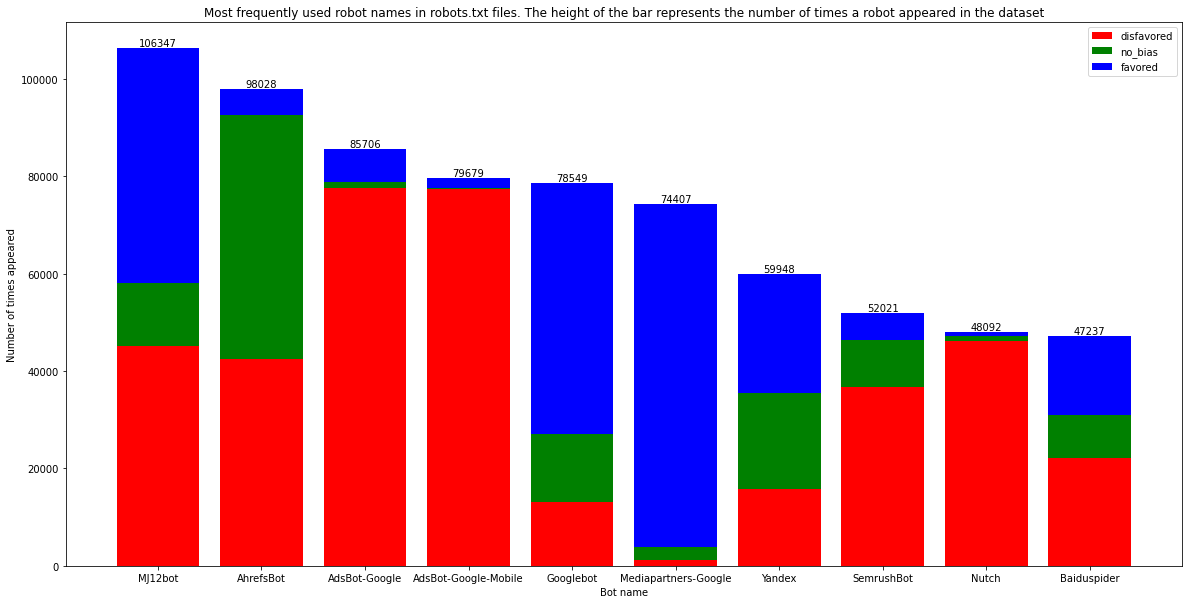

In [209]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.bar(top_10_appeared_bots_name, y_disfavored, color='r', label='disfavored')
ax.bar(top_10_appeared_bots_name, y_no_bias, bottom=y_disfavored, color='g', label='no_bias')
ax.bar(top_10_appeared_bots_name, y_favored, bottom=y_disfavored + y_no_bias, color='b', label='favored')

ax.set_title('Most frequently used robot names in robots.txt files. The height of the bar represents the number of times a robot appeared in the dataset')
ax.set_xlabel('Bot name')
ax.set_ylabel('Number of times appeared')

ax.legend()

# helper method to auto-label bars
ax.bar_label(ax.containers[2])

In [12]:
percentage_of_the_count_by_number_of_appearance = nb_of_times_appeared.value_counts().map(lambda v: v/total_number_of_user_agents*100)

Text(0, 0.5, 'Percentage')

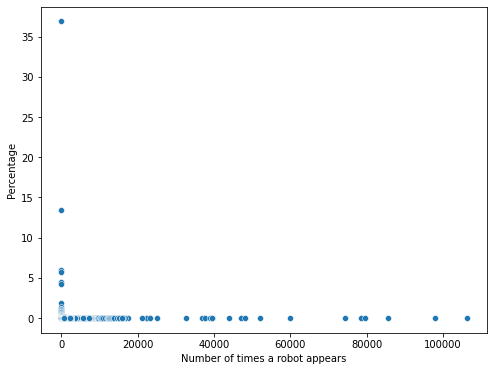

In [359]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x=percentage_of_the_count_by_number_of_appearance.index, y=percentage_of_the_count_by_number_of_appearance.values)

ax.set_xlabel('Number of times a robot appears')
ax.set_ylabel('Percentage')

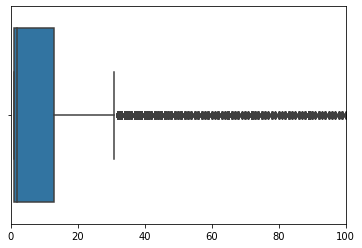

In [20]:
# Advanced customization of the boxplot
plt.ylim(0, 100)
plt.xlim(0, 100)

sns.boxplot(x=nb_of_times_appeared.values)
plt.show()

In [399]:
nb_of_times_appeared.describe()

count     23613.000000
mean        180.467624
std        1899.308540
min           1.000000
25%           1.000000
50%           2.000000
75%          13.000000
max      106347.000000
dtype: float64

In [316]:
# Let N be the total number of robots.txt files in the dataset.
N = df.shape[0]
print(N)

2022575


In [317]:
# favorability of a robot is = (#favored - #disfavored)/N
favorability_of_robots = (favored_1d_series.value_counts().sub(disfavored_1d_series.value_counts(), fill_value=0)/N).sort_values(ascending=False)

In [314]:
table = PrettyTable()

table.field_names = ['Bot name', '#favored', '#disfavored', '#favorability', 'σ: categorical standard deviation']

for bot,score in favorability_of_robots[:10].items():
    N_favored = favored_1d_series.value_counts()[bot]
    N_disfavored = disfavored_1d_series.value_counts()[bot]
    sigma = np.sqrt(np.abs(score) * (1 - np.abs(score))/N)
    table.add_row([bot, N_favored, N_disfavored, round(score, 6), round(sigma, 6)])
    
print(table)

+----------------------+----------+-------------+---------------+-----------------------------------+
|       Bot name       | #favored | #disfavored | #favorability | σ: categorical standard deviation |
+----------------------+----------+-------------+---------------+-----------------------------------+
| Mediapartners-Google |  70470   |     1169    |    0.034264   |              0.000128             |
|      Pinterest       |  43759   |      71     |     0.0216    |              0.000102             |
|    adsbot-google     |  39463   |      9      |    0.019507   |              9.7e-05              |
|      Googlebot       |  51560   |    13022    |    0.019054   |              9.6e-05              |
|       bingbot        |  27409   |     4909    |    0.011124   |              7.4e-05              |
|   Googlebot-Image    |  17341   |     2463    |    0.007356   |               6e-05               |
|      Twitterbot      |  14729   |     532     |    0.007019   |              5.9

In [315]:
table = PrettyTable()

table.field_names = ['Bot name', '#favored', '#disfavored', '#favorability', 'σ: categorical standard deviation']

for bot,score in favorability_of_robots[-1:-11:-1].items():
    N_favored = favored_1d_series.value_counts()[bot]
    N_disfavored = disfavored_1d_series.value_counts()[bot]
    sigma = np.sqrt(np.abs(score) * (1 - np.abs(score))/N)
    table.add_row([bot, N_favored, N_disfavored, round(score, 6), round(sigma, 6)])
    
print(table)

+----------------------+----------+-------------+---------------+-----------------------------------+
|       Bot name       | #favored | #disfavored | #favorability | σ: categorical standard deviation |
+----------------------+----------+-------------+---------------+-----------------------------------+
| AdsBot-Google-Mobile |   2089   |    77385    |   -0.037228   |              0.000133             |
|    AdsBot-Google     |   6842   |    77671    |   -0.035019   |              0.000129             |
|        Nutch         |   954    |    46170    |   -0.022356   |              0.000104             |
|      AhrefsBot       |   5342   |    42518    |   -0.018381   |              9.4e-05              |
|      SemrushBot      |   5623   |    36679    |   -0.015355   |              8.6e-05              |
|       NerdyBot       |    8     |    21368    |   -0.010561   |              7.2e-05              |
|       BLEXBot        |   3676   |    24061    |   -0.010079   |               7e

In [411]:
df['tld'] = df.apply(lambda row: urlparse(row['robotstxt_url']).netloc.split('.')[-1], axis=1)

In [416]:
tld_stats_series = df.groupby('tld').size().sort_values(ascending=False)

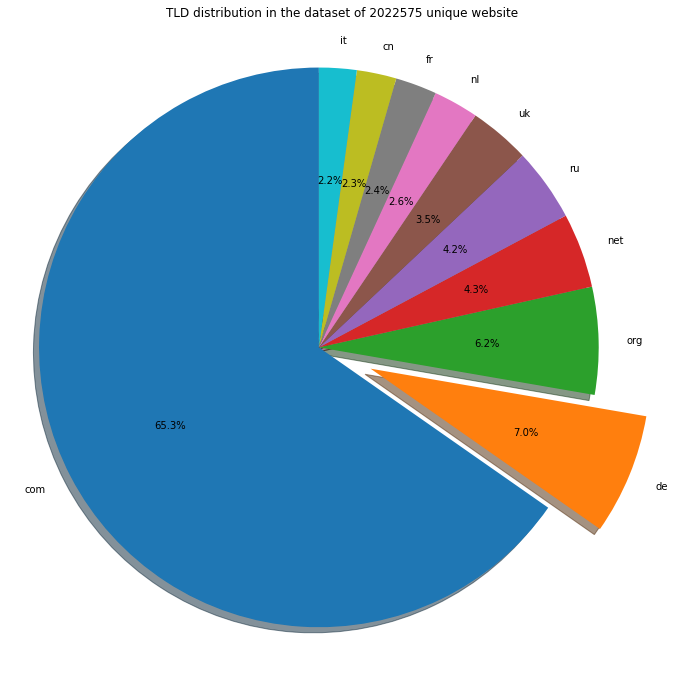

In [439]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = tld_stats_series.index[:10]
sizes = tld_stats_series.values[:10]
explode = (0, 0.2, 0, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(12, 12))

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title(f'TLD distribution in the dataset of {N} unique website')

plt.show()

In [436]:
tld_stats_series[-11:]

tld
bg:2096     1
220         1
bg:8474     1
kr:447      1
de:9050     1
de:9000     1
kr:4447     1
kr:44466    1
de:8080     1
de:8006     1
care:443    1
dtype: int64

In [481]:
df_cn = df[df['tld'] == 'cn']
df_ru = df[df['tld'] == 'ru']
df_de = df[df['tld'] == 'de']

## Analysing Chinese domains

In [453]:
disfavored_1d_series, no_bias_1d_series, favored_1d_series, nb_of_times_appeared, top_10_appeared_bots_name, y_disfavored, y_no_bias, y_favored, total_number_of_user_agents, N = get_metrics(df_cn)

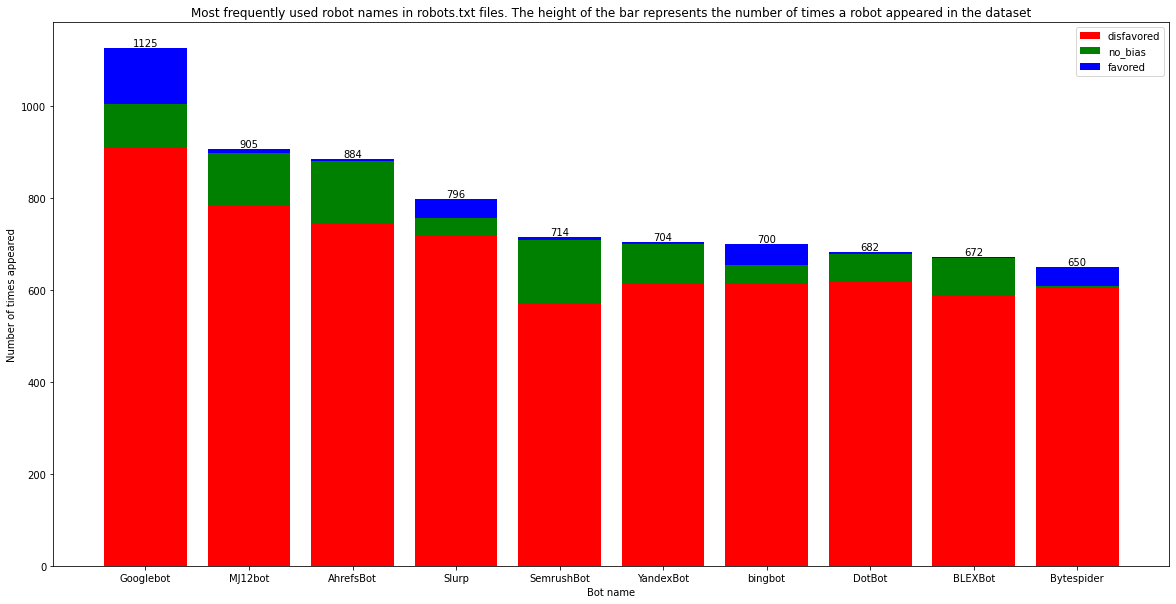

In [454]:
plot_most_frequently_appeared_bots(top_10_appeared_bots_name, y_disfavored, y_no_bias, y_favored)

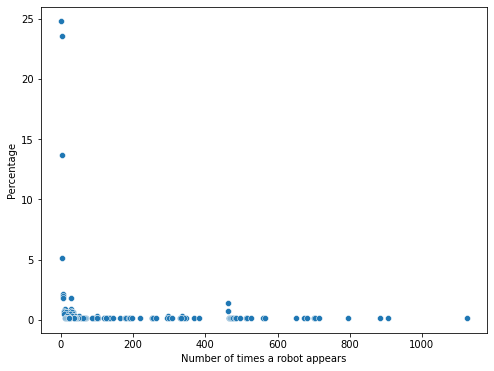

In [458]:
plot_number_of_time_bot_appears_distribution(nb_of_times_appeared, total_number_of_user_agents)

In [459]:
favorability_of_robots = get_bots_favorability(favored_1d_series, disfavored_1d_series, N)

In [462]:
favorability_of_robots[:10]

Baiduspider           0.004668
360Spider             0.001984
Sogou blog            0.001605
Baiduspider-image     0.001167
Twitterbot            0.000992
HaosouSpider          0.000875
Baiduspider-news      0.000846
Googlebot-Image       0.000817
Baiduspider-mobile    0.000817
Googlebot-Mobile      0.000788
dtype: float64

In [467]:
draw_favorability_table(favorability_of_robots, favored_1d_series, disfavored_1d_series, f=1)

+--------------------+----------+-------------+---------------+-----------------------------------+
|      Bot name      | #favored | #disfavored | #favorability | σ: categorical standard deviation |
+--------------------+----------+-------------+---------------+-----------------------------------+
|    Baiduspider     |   185    |      25     |    0.004668   |              0.000368             |
|     360Spider      |    76    |      8      |    0.001984   |              0.00024              |
|     Sogou blog     |    59    |      4      |    0.001605   |              0.000216             |
| Baiduspider-image  |    46    |      6      |    0.001167   |              0.000184             |
|     Twitterbot     |    35    |      1      |    0.000992   |              0.00017              |
|    HaosouSpider    |    30    |      0      |    0.000875   |              0.00016              |
|  Baiduspider-news  |    30    |      1      |    0.000846   |              0.000157             |


In [468]:
draw_favorability_table(favorability_of_robots, favored_1d_series, disfavored_1d_series, f=-1)

+------------+----------+-------------+---------------+-----------------------------------+
|  Bot name  | #favored | #disfavored | #favorability | σ: categorical standard deviation |
+------------+----------+-------------+---------------+-----------------------------------+
| Googlebot  |   122    |     910     |   -0.022991   |              0.00081              |
|  MJ12bot   |    8     |     784     |    -0.02264   |              0.000803             |
| AhrefsBot  |    5     |     744     |   -0.021561   |              0.000785             |
|   Slurp    |    41    |     719     |   -0.019781   |              0.000752             |
|   DotBot   |    4     |     618     |   -0.017914   |              0.000716             |
| YandexBot  |    4     |     612     |   -0.017739   |              0.000713             |
|  BLEXBot   |    4     |     586     |    -0.01698   |              0.000698             |
|  bingbot   |    46    |     613     |   -0.016543   |              0.000689   

## Analysing Russian domains

In [472]:
disfavored_1d_series, no_bias_1d_series, favored_1d_series, nb_of_times_appeared, top_10_appeared_bots_name, y_disfavored, y_no_bias, y_favored, total_number_of_user_agents, N = get_metrics(df_ru)

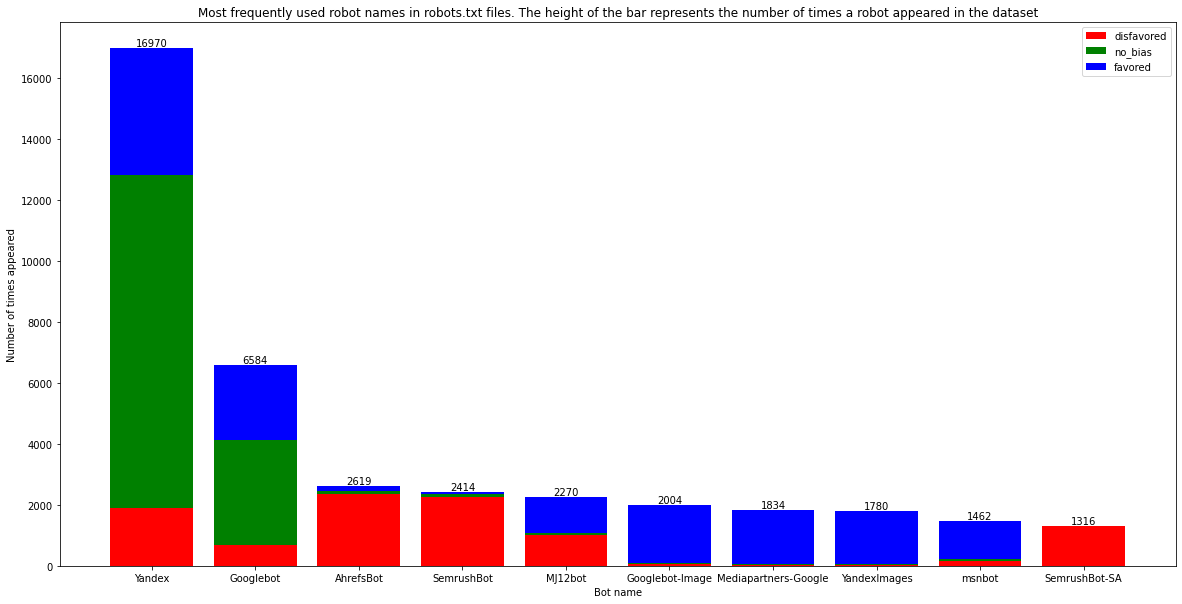

In [473]:
plot_most_frequently_appeared_bots(top_10_appeared_bots_name, y_disfavored, y_no_bias, y_favored)

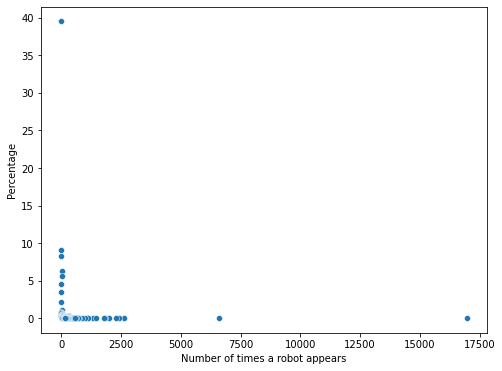

In [474]:
plot_number_of_time_bot_appears_distribution(nb_of_times_appeared, total_number_of_user_agents)

In [476]:
favorability_of_robots = get_bots_favorability(favored_1d_series, disfavored_1d_series, N)

In [478]:
favorability_of_robots[:10]

Yandex                  0.036116
Googlebot-Image         0.029292
Googlebot               0.028009
Mediapartners-Google    0.027645
YandexImages            0.026489
msnbot                  0.017448
YaDirectBot             0.013648
YandexDirect            0.007822
GoogleBot               0.007822
YadirectBot             0.005130
dtype: float64

In [479]:
draw_favorability_table(favorability_of_robots, favored_1d_series, disfavored_1d_series, f=1)

+----------------------+----------+-------------+---------------+-----------------------------------+
|       Bot name       | #favored | #disfavored | #favorability | σ: categorical standard deviation |
+----------------------+----------+-------------+---------------+-----------------------------------+
|        Yandex        |   4161   |     1880    |    0.036116   |              0.000742             |
|   Googlebot-Image    |   1902   |      52     |    0.029292   |              0.000671             |
|      Googlebot       |   2459   |     690     |    0.028009   |              0.000657             |
| Mediapartners-Google |   1768   |      22     |    0.027645   |              0.000652             |
|     YandexImages     |   1713   |      40     |    0.026489   |              0.000639             |
|        msnbot        |   1255   |     153     |    0.017448   |              0.000521             |
|     YaDirectBot      |   868    |      6      |    0.013648   |              0.0

In [480]:
draw_favorability_table(favorability_of_robots, favored_1d_series, disfavored_1d_series, f=-1)

+------------------+----------+-------------+---------------+-----------------------------------+
|     Bot name     | #favored | #disfavored | #favorability | σ: categorical standard deviation |
+------------------+----------+-------------+---------------+-----------------------------------+
|    SemrushBot    |    69    |     2266    |   -0.034786   |              0.000729             |
|    AhrefsBot     |   177    |     2354    |   -0.034469   |              0.000726             |
|  SemrushBot-SA   |    9     |     1298    |   -0.020409   |              0.000563             |
|     BLEXBot      |    17    |     626     |   -0.009642   |              0.000389             |
|      dotbot      |    8     |     461     |   -0.007172   |              0.000336             |
|      psbot       |    17    |     422     |   -0.006412   |              0.000318             |
| Offline Explorer |    12    |     379     |   -0.005811   |              0.000302             |
|    WebCopier     |

## Analysing German domains

In [489]:
disfavored_1d_series, no_bias_1d_series, favored_1d_series, nb_of_times_appeared, top_10_appeared_bots_name, y_disfavored, y_no_bias, y_favored, total_number_of_user_agents, N = get_metrics(df_de)

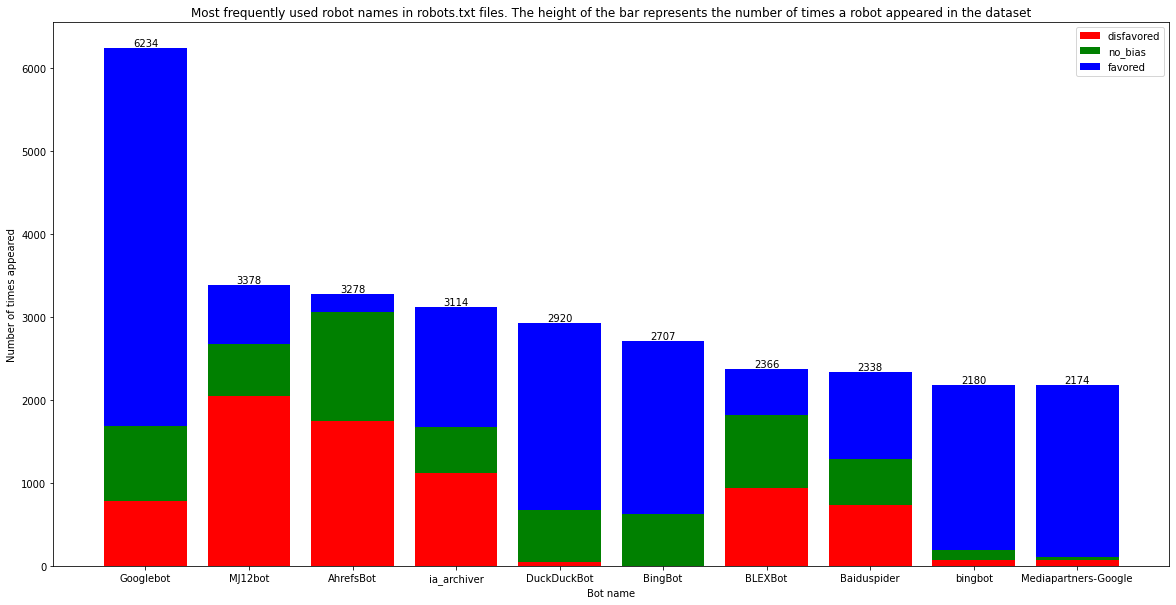

In [490]:
plot_most_frequently_appeared_bots(top_10_appeared_bots_name, y_disfavored, y_no_bias, y_favored)

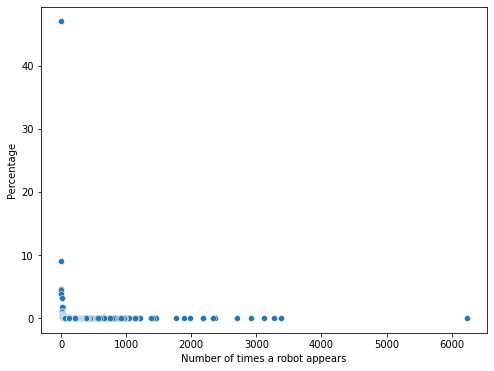

In [491]:
plot_number_of_time_bot_appears_distribution(nb_of_times_appeared, total_number_of_user_agents)

In [492]:
favorability_of_robots = get_bots_favorability(favored_1d_series, disfavored_1d_series, N)

In [493]:
favorability_of_robots[:10]

Googlebot               0.036072
DuckDuckBot             0.021063
BingBot                 0.019896
Mediapartners-Google    0.019045
bingbot                 0.018375
Yahoo! Slurp            0.012971
Seznambot               0.008303
rdfbot                  0.008293
YetiBot                 0.008293
ichiro                  0.008150
dtype: float64

In [494]:
draw_favorability_table(favorability_of_robots, favored_1d_series, disfavored_1d_series, f=1)

+----------------------+----------+-------------+---------------+-----------------------------------+
|       Bot name       | #favored | #disfavored | #favorability | σ: categorical standard deviation |
+----------------------+----------+-------------+---------------+-----------------------------------+
|      Googlebot       |   4550   |     779     |    0.036072   |              0.000577             |
|     DuckDuckBot      |   2249   |      47     |    0.021063   |              0.000444             |
|       BingBot        |   2081   |      1      |    0.019896   |              0.000432             |
| Mediapartners-Google |   2061   |      70     |    0.019045   |              0.000423             |
|       bingbot        |   1987   |      66     |    0.018375   |              0.000415             |
|     Yahoo! Slurp     |   1366   |      10     |    0.012971   |              0.00035              |
|      Seznambot       |   868    |      0      |    0.008303   |              0.0

In [495]:
draw_favorability_table(favorability_of_robots, favored_1d_series, disfavored_1d_series, f=-1)

+----------------------+----------+-------------+---------------+-----------------------------------+
|       Bot name       | #favored | #disfavored | #favorability | σ: categorical standard deviation |
+----------------------+----------+-------------+---------------+-----------------------------------+
|      AhrefsBot       |   221    |     1747    |   -0.014597   |              0.000371             |
| AdsBot-Google-Mobile |   185    |     1580    |   -0.013344   |              0.000355             |
|       MJ12bot        |   706    |     2044    |   -0.012799   |              0.000348             |
|    AdsBot-Google     |   312    |     1645    |   -0.012751   |              0.000347             |
|      SemrushBot      |    45    |     1261    |   -0.011632   |              0.000332             |
|      WebCopier       |    23    |     1018    |   -0.009518   |               0.0003              |
|   Offline Explorer   |    20    |     935     |   -0.008752   |              0.0